# Interrupcion Legal de Embarazo CDMX

### Vista general de datos

In [19]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

pd.set_option('display.max_rows', 50)
embarazo = pd.read_csv("/Users/iboa08/Desktop/ML/interrupcion-legal-del-embarazo.csv", engine="python")        


### Mini limpieza de datos

In [20]:
embarazoTest = embarazo

embarazoTest = embarazoTest.drop("AUTOREF", axis=1)
embarazoTest = embarazoTest.drop("H_FINGRESO", axis=1)
embarazoTest = embarazoTest.drop("P_CONSENT", axis=1)
embarazoTest = embarazoTest.drop("PARENTEZCO", axis=1)
embarazoTest = embarazoTest.drop("MENARCA", axis=1)
embarazoTest = embarazoTest.drop("FSEXUAL", axis=1)
embarazoTest = embarazoTest.drop("SEMEMB", axis=1)
embarazoTest = embarazoTest.drop("GESTA", axis=1)
embarazoTest = embarazoTest.drop("NABORTO", axis=1)
embarazoTest = embarazoTest.drop("NPARTOS", axis=1)
embarazoTest = embarazoTest.drop("NCESAREA", axis=1)
embarazoTest = embarazoTest.drop("C_NUM", axis=1)
embarazoTest = embarazoTest.drop("P_SEMGEST", axis=1)
embarazoTest = embarazoTest.drop("P_DIASGESTA", axis=1)
embarazoTest = embarazoTest.drop("PROCILE", axis=1)
embarazoTest = embarazoTest.drop("S_COMPLICA", axis=1)
embarazoTest = embarazoTest.drop("PANTICONCEP", axis=1)
embarazoTest = embarazoTest.drop("DESC_SERVICIO", axis=1)
embarazoTest = embarazoTest.drop("MOTILES", axis=1)
embarazoTest = embarazoTest.drop("ANTICONCEPTIVO", axis=1)
embarazoTest = embarazoTest.drop("CONSEJERIA", axis=1)
#embarazoTest = embarazoTest.drop("ALC O MUNICIPIO", axis=1)
embarazoTest = embarazoTest.drop("FMENSTRUA", axis=1)
embarazoTest = embarazoTest.drop("NHIJOS", axis=1)
embarazoTest = embarazoTest.drop("DESC_DERECHOHAB", axis=1)
embarazoTest = embarazoTest.drop("FINGRESO", axis=1)

embarazoTest['OCUPACION'] = embarazoTest.OCUPACION.fillna('No se dijo')
embarazoTest['NILE'] = embarazoTest.NILE.fillna(0)
dict = {"preparatoria completa": "PREPACOM", "secundaria completa": "SECCOM",
       "licenciatura completa": "LICCOM", "primaria completa": "PRIMCOM", 
       "preparatoria incompleta": "PREPINC", "licenciatura incompleta": "LICINC",
       "secundaria incompleta": "SECINC", "ninguno": "NINGUNO"}
embarazoTest = embarazoTest.replace({"NIVEL_EDU": dict})
dict = {"Obrera": "Otro", "Secrataria": "Otro",
       "Cajera": "Otro", "Enfermera": "Otro", 
       "Cocinera": "Otro", "Recepcionista": "Otro",
       "Dentista": "Otro", "Abogada": "Otro",
       "Artista": "Otro","Contadora": "Otro",
       "Textil": "Otro","Periodista o Publicista": "Otro",
       "Administradora": "Otro","Ejecutiva": "Otro",
       "Capturista": "Otro","Voluntaria o Trabajadora Social": "Otro","Trabajadora Sexual": "Otro",
       "Vetarinaria": "Otro","Telefonista": "Otro","Arquitecta": "Otro","Fisioterapeuta": "Otro",
        "Constructura o Elecetricista": "Otro","Ingeniera": "Otro",
       "Bibliotecaria": "Otro","Chofer": "Otro","Asesora financiera": "Otro","Auditora": "Otro",
       "Recursos Humanos": "Otro","Polic�a o Seguridad": "Otro","Modelo": "Otro",
       "Log�stica o Eventos": "Otro","Dise�adora": "Otro","Fot�grafa": "Otro","M�dico": "Otro",
       "Psic�loga": "Otro","Nuti�loga": "Otro","Asesora jur�dica": "Otro","Inform�tica o Tecnolog�a": "Otro",
       "Constructora o Elecetricista": "Otro","Mec�nica": "Otro","Trabajadora de campo": "Otro",
        "Cient�fica": "Otro","Param�dico": "Otro","Trabajadora del Sector P�blico": "SectorPublico",
       "Profesora o Educadora": "Otro","Estilista": "Otro","Trabajadora del Hogar": "Otro",
       "Secretaria": "Otro"}
embarazoTest = embarazoTest.replace({"OCUPACION": dict})
embarazoTest = embarazoTest.dropna()


### Explicación limpieza

En la celda anterior se trata de limpiar los datos de una manera que sea útil para su uso dentro de esta libreta. Despúes de haber consultado el diccionario de que significa los nombres de las columnas, se opto por quitar ciertas columnas dignas no necesarias para nuestro proyecto, lo cual reduce la cantidad de atributos totales. Despues se analizó si hay valores faltantes dentro de nuestros datos y se hizo una imputación de los datos, en este caso se hizo la suposición de que dentro de la columna de número de abortos previos, los valores NaN no han tenido un aborto anterior, lo cual se replazo con un 0. Para la columna de ocupación, se creo un nuevo atributo donde en vez de no tener un valor, se aplico el valor de no se dijo. Despues de haber hecho la imputación, se modificaron los datos para agrupar ciertos valores con otros, de esta manera será más fácil de manejar despues.

### Información sobre dataset despues de limpieza

In [21]:
embarazoTest.info()
#embarazoTest.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54944 entries, 1 to 62002
Data columns (total 11 columns):
ANO                     54944 non-null int64
MES                     54944 non-null object
CVE_HOSPITAL            54944 non-null int64
EDOCIVIL_DESCRIPCION    54944 non-null object
EDAD                    54944 non-null int64
NIVEL_EDU               54944 non-null object
OCUPACION               54944 non-null object
RELIGION                54944 non-null object
ENTIDAD                 54944 non-null object
ALC O MUNICIPIO         54944 non-null object
NILE                    54944 non-null float64
dtypes: float64(1), int64(3), object(7)
memory usage: 5.0+ MB


### Cantidad de abortos por mes

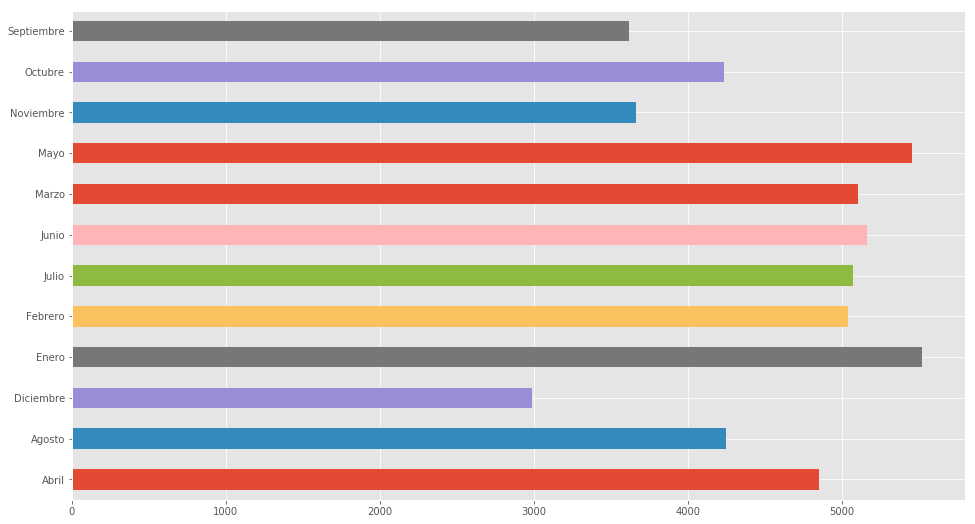

In [22]:
embarazoTest['MES'].value_counts().sort_index().plot.barh()

### Cantidad abortos por mes y edad

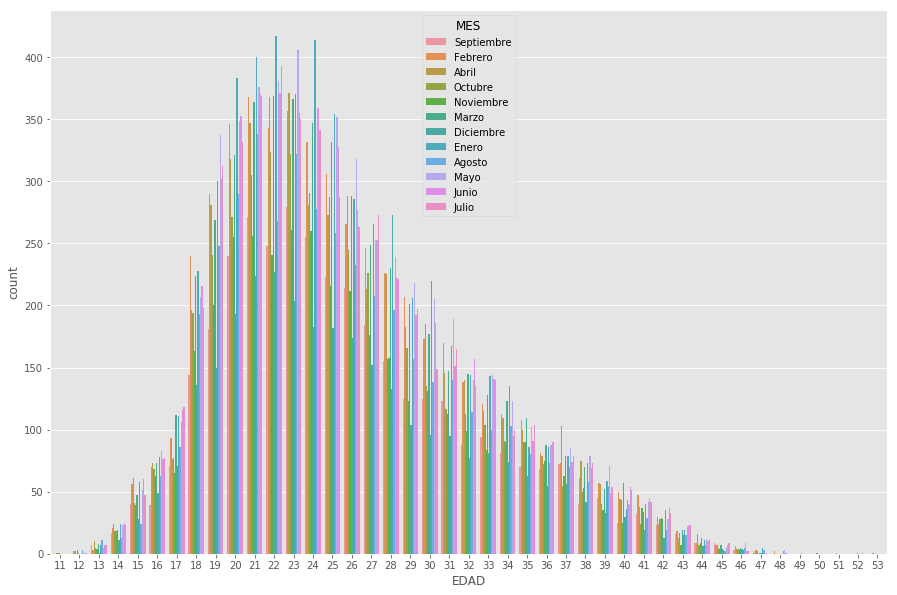

In [23]:
plt.figure(figsize=(15, 10))
sns.countplot(x="EDAD", hue="MES", data=embarazoTest)

### Cantidad de abortos por mes por hospital

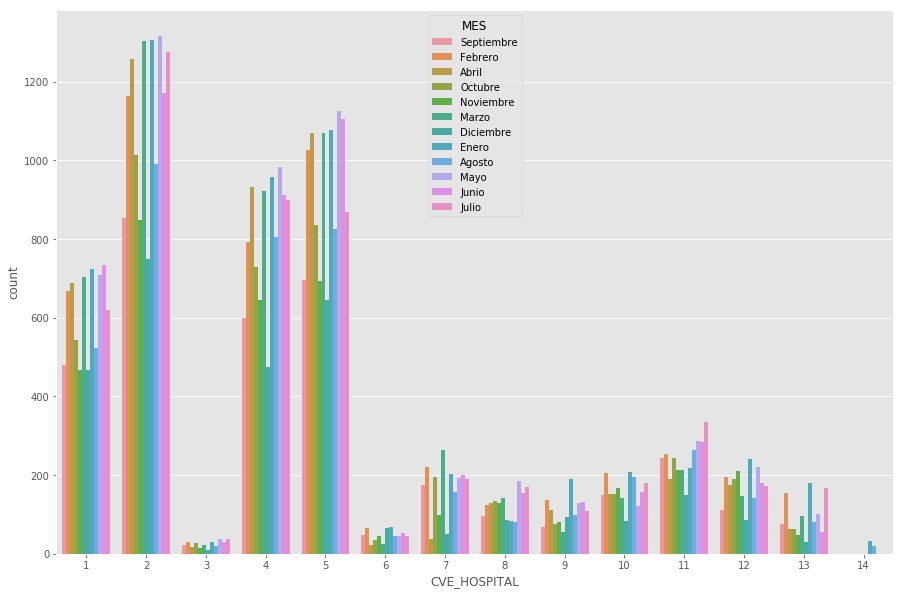

In [24]:
plt.figure(figsize=(15, 10))
sns.countplot(x="CVE_HOSPITAL", hue="MES", data=embarazoTest)

### Cantidad de abortos anteriores por edad

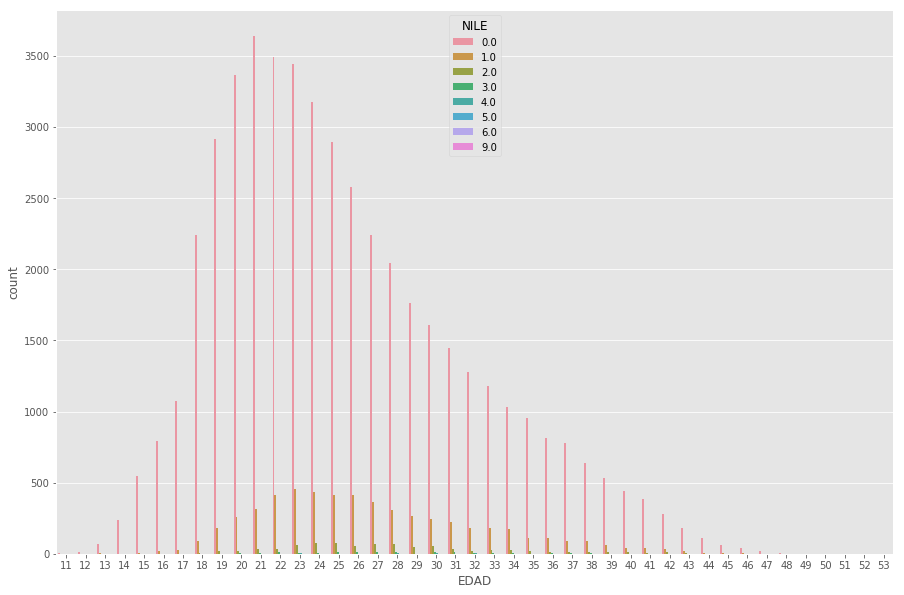

In [25]:
plt.figure(figsize=(15, 10))
sns.countplot(x="EDAD", hue="NILE", data=embarazoTest)

In [26]:
from sklearn.model_selection import train_test_split

# Get dummies
#X = pd.get_dummies(embarazoTest, prefix_sep='_', drop_first=True)

#separando los conjuntos de los data en training y testing 
y = embarazoTest.CVE_HOSPITAL
x = embarazoTest.drop('CVE_HOSPITAL',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeRegressor()
#clf = clf.fit(x_train, y_train)
clf = clf.fit(x_train, y_train)

ValueError: could not convert string to float: 'Mayo'

In [55]:
y_pred = clf.predict(x_test)
y_pred

array([ 2, 12, 11, ...,  2,  3, 13])

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 781  224    3  201  112    5    8    5    0    8   56   64   24    2]
 [ 216 1136    6  560  421    9   27   61   41   33  125   27   16    0]
 [   0    3   13    4   18    2    6    1    1    2    6    0    0    0]
 [ 216  551    2  666  298    4   13   21   18   26   90   24   13    0]
 [  93  410   26  243 1011   14   80   34   17   98   52   18   15    0]
 [   4   10    0    0    8   75    5    0    0    0    1    4   17    0]
 [  10   25    7   22   82   10  243    2    0    4    5    2    4    0]
 [   6   74    1   26   46    1    2   62   31   28   57    1    1    0]
 [   1   48    0    9   15    0    0   49   90    9   25    0    4    0]
 [   9   33    6   14  102    0    3   20    7  171   20    1    1    0]
 [  54  115    5   82   45    3    5   44   38   19  144   14    6    0]
 [  52   28    0   23   11    3    1    1    1    4   16  240   30    0]
 [  17   18    0    5   15   12    4    0    0    1    5   21   99    2]
 [   5    0    0    0    0    0    0    0    0    0